

---
Por: Ángela Daniela Córdoba Álvarez


---




### Regresión Simple

Creación de un Conjunto de Datos con Variables Independientes y Dependientes:

In [1]:
# Importamos librerías

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
df_sales = pd.read_csv('Online Sales Data.csv')
df_sales.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [3]:
df_sales['Date']= pd.to_datetime(df_sales['Date']) # Pasar a formato datetime


In [4]:
# Mostramos los missing values
print(df_sales.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [5]:
# Sacando información del dataset
x_sales = np.array(df_sales['Transaction ID'])
y_sales = np.array(df_sales['Unit Price'])

Cálculo de la Correlación entre Variables Independientes y Dependientes:

In [6]:
def calcular_correlacion(x, y):
    correlacion = np.corrcoef(x, y)[0, 1]
    return correlacion
correlacion = calcular_correlacion(x_sales, y_sales)
print("La correlación entre el ID de la transacción y el precio por unidad es:", correlacion)


La correlación entre el ID de la transacción y el precio por unidad es: -0.07186258684744527


Lo anterior presenta una correlación negativa, es decir, cuando los valores de una variable tienden a incrementarse, los de la otra variable descienden.

Graficar un Gráfico de Dispersión de los Datos:

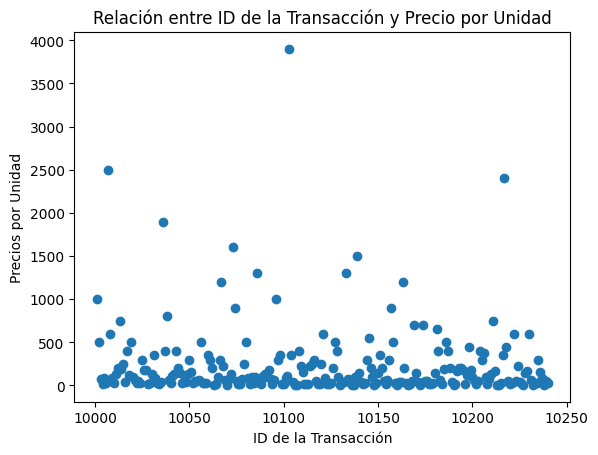

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x_sales, y_sales)
plt.xlabel('ID de la Transacción')
plt.ylabel('Precios por Unidad')
plt.title('Relación entre ID de la Transacción y Precio por Unidad')
plt.show()


Ajustar un Modelo de Regresión Lineal y Visualizar la Línea de Regresión:


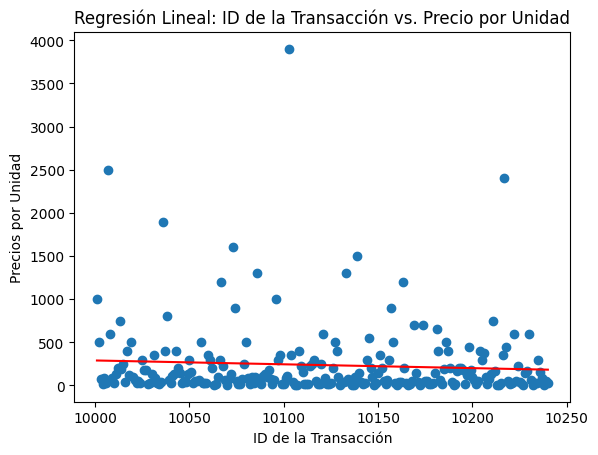

In [8]:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(x_sales.reshape(-1, 1), y_sales)

plt.scatter(x_sales, y_sales)
plt.plot(x_sales, modelo_regresion.predict(x_sales.reshape(-1, 1)), color='red')
plt.xlabel('ID de la Transacción')
plt.ylabel('Precios por Unidad')
plt.title('Regresión Lineal: ID de la Transacción vs. Precio por Unidad')
plt.show()


### Regresión Múltiple

MSE: 18125.060402436484
RMSE: 134.62934450719308
MAE: 92.49665504697627
R^2: 0.9007952596421704


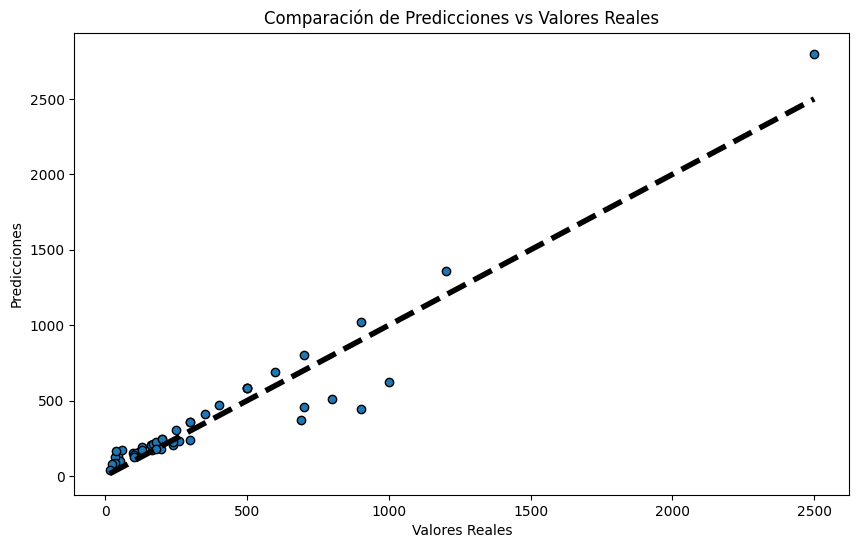

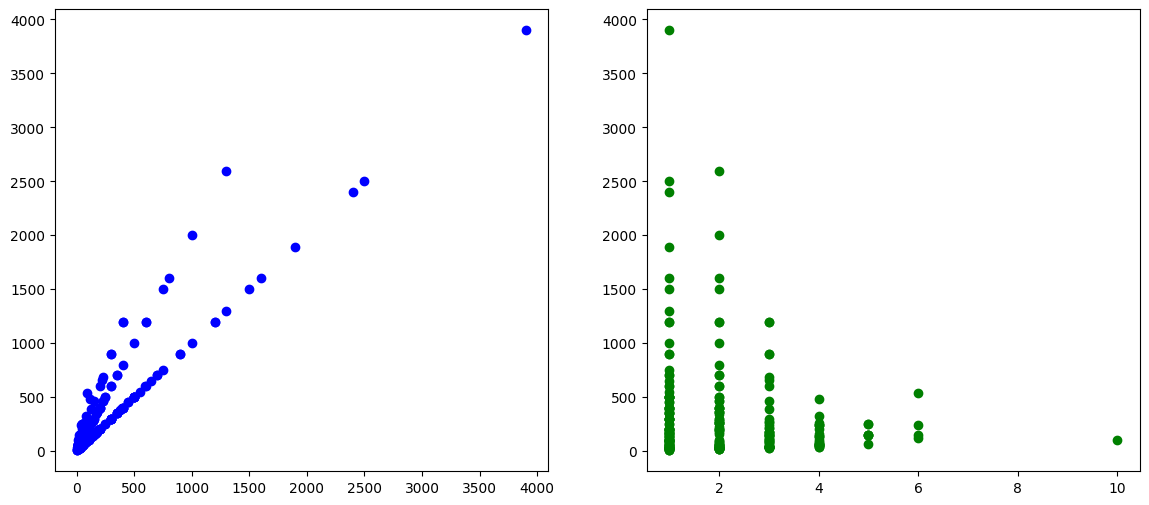

In [9]:
# Importar las librerías necesarias
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Seleccionar las columnas de características (X) y la columna objetivo (y)
selected_columns = ['Unit Price', 'Units Sold']
X = df_sales[selected_columns].values
y = df_sales['Total Revenue'].values

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

# Si las características son muchas, graficar todas podría ser complicado.
# Vamos a graficar sólo las dos primeras características contra la variable objetivo para visualización.

# Gráfico de dispersión de las características contra la variable objetivo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, color='blue')
plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, color='green')
plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.show()

Modelo Lineal y Aplicación en la Predicción:

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 3  # Generar y = 3X + ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 8.25977922274286


Método de Mínimos Cuadrados:


In [11]:
# Definir la función para el método de mínimos cuadrados
def least_squares(X, y):
	X = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar columna de unos para el término de intercepción
	coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
	return coefficients

# Usar la función para ajustar un modelo
coefficients = least_squares(X, y)


Interpretación de la Pendiente y la Intersección:

Intersección: 0.6190205661343011
Coeficientes de la pendiente: [2.99415546]


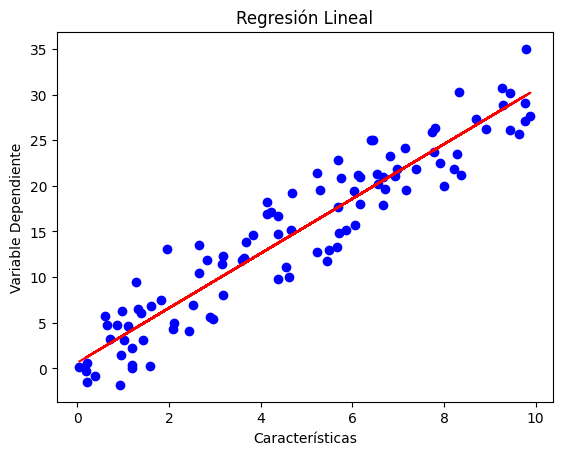

In [12]:
# Extraer los coeficientes de la pendiente e intersección del modelo de Regresión Lineal
intercept = model.intercept_
coefficients = model.coef_
print("Intersección:", intercept)
print("Coeficientes de la pendiente:", coefficients)

# Graficar la línea de regresión
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')  # Línea de regresión
plt.xlabel('Características')
plt.ylabel('Variable Dependiente')
plt.title('Regresión Lineal')
plt.show()


### Regresión Polinómica

Regresión Polinomial:


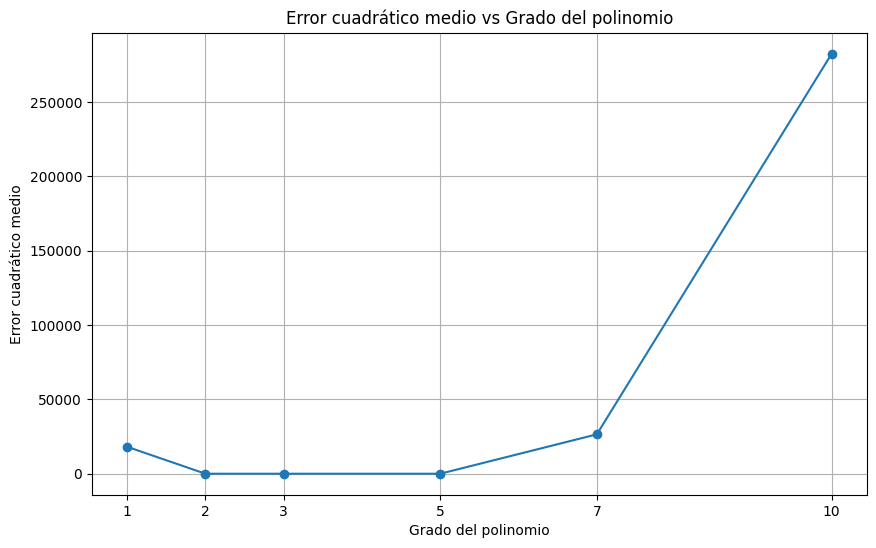

MSE:  [18125.060402436444, 8.78812676352692e-25, 2.222373946069568e-24, 1.8751467144909668, 26488.80860056366, 282554.2049466082]
RMSE: [134.62934450719294, 9.374500927263766e-13, 1.490762873856727e-12, 1.3693599652724504, 162.7538282209167, 531.5582799153901]
MAE:  [92.49665504697616, 8.264130120968124e-13, 7.852237378832191e-13, 1.0944491513390788, 121.7019609949596, 251.96444885399953]
R2:   [0.9007952596421707, 1.0, 1.0, 0.9999897366718337, 0.855017565665386, -0.5465171379496838]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos ficticios
selected_columns = ['Unit Price', 'Units Sold']
X = df_sales[selected_columns].values
y = df_sales['Total Revenue'].values  # Generar una función sinusoidal con ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
degrees = [1, 2, 3, 5, 7, 10]
mse_list = []
rmse_list = []
mae_list = []
r2_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, y_train)

	y_pred = model.predict(X_test_poly)
	mse = mean_squared_error(y_test, y_pred)
	rmse = np.sqrt(mse)
	mae = mean_absolute_error(y_test, y_pred)
	r2 = r2_score(y_test, y_pred)
	mse_list.append(mse)
	rmse_list.append(rmse)
	mae_list.append(mae)
	r2_list.append(r2)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker='o')
plt.title('Error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()

print(f'MSE:  {mse_list}')
print(f'RMSE: {rmse_list}')
print(f'MAE:  {mae_list}')
print(f'R2:   {r2_list}')

### Regresión Logarítmica

Regresión Logarítmica:
Generación de datos artificiales.


In [14]:
import numpy as np

columns = ['Unit Price', 'Units Sold']
X = df_sales[columns].values
y = df_sales['Total Revenue'].values

Aplicación de Regresión Logarítmica:


In [15]:
from scipy.optimize import curve_fit

def logarithmic_function(x, a, b):
	return a * np.log(x) + b

# Ajustar la curva logarítmica a los datos
params, _ = curve_fit(logarithmic_function, x_sales, y_sales)
a, b = params

Interpretación de los coeficientes:


In [16]:
print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)
print("Interpretación:")
print("El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.")
print("El coeficiente 'b' representa el intercepto de la curva logarítmica.")


Coeficiente 'a': -4500.859453674376
Coeficiente 'b': 41744.64884921507
Interpretación:
El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.
El coeficiente 'b' representa el intercepto de la curva logarítmica.


In [17]:
x_log = np.log(X)

#Ajustar modelo regresión lineal
model = LinearRegression()
model.fit(x_log, y)

y_pred = model.predict(x_log)

<ipython-input-18-c348e5935a53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sales, x='Units Sold', y='Unit Price', palette="muted")


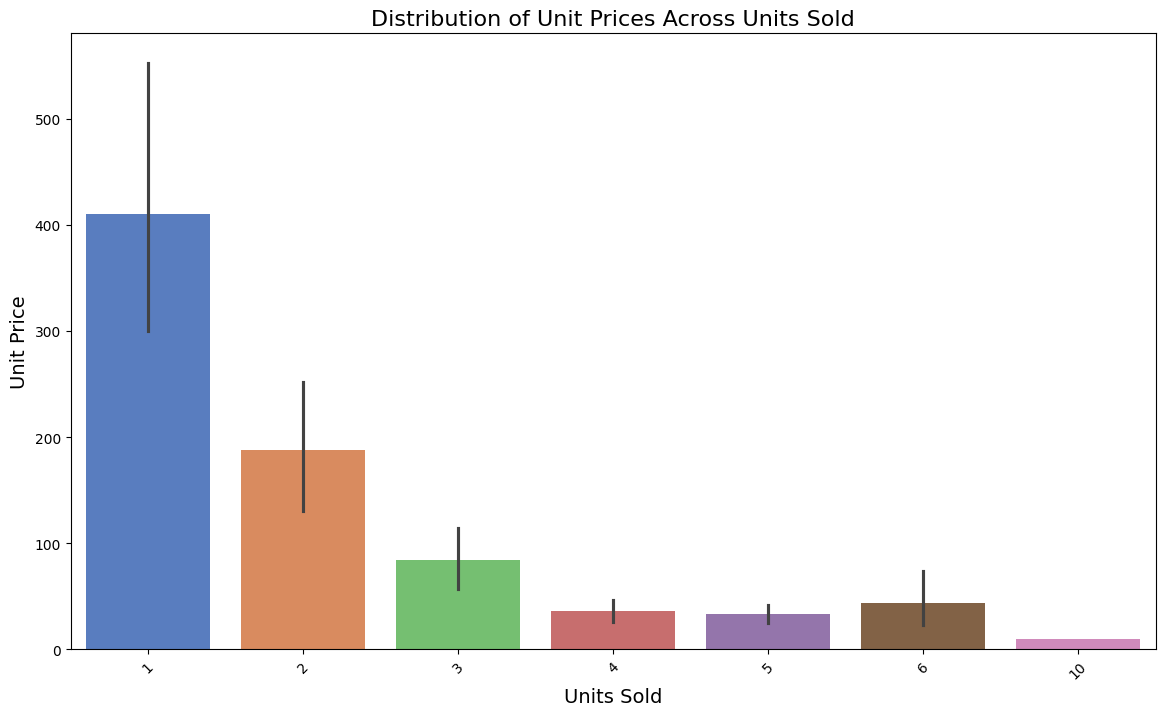

In [18]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_sales, x='Units Sold', y='Unit Price', palette="muted")
plt.title('Distribution of Unit Prices Across Units Sold', fontsize=16)
plt.xlabel('Units Sold', fontsize=14)
plt.ylabel('Unit Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Generar predicciones
y_pred = model.predict(x_log)

# Calcular las métricas de desempeño
mse = mean_squared_error(y_sales, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_sales, y_pred)
r2 = r2_score(y_sales, y_pred)

print(f"MSE: {mse}")
print(f"MSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 111171.02016230366
MSE: 333.423184800193
MAE: 249.52198722027217
R^2: 0.39467807799193777


### Regresión Logística

Regresión Logística:

Implementación de Regresión Logística desde Cero


In [20]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Cálculo del gradiente
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Actualización de parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)


Prueba de la Implementación de Regresión Logística


In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Generar datos de ejemplo
x_sales, y_sales = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_sales, y_sales, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred = model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)


Precisión del modelo de regresión logística: 0.88


Comparación con Sklearn


In [22]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

# Crear y entrenar modelo de regresión logística de sklearn
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predecir en conjunto de prueba
sklearn_y_pred = sklearn_model.predict(X_test)

# Calcular precisión
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("Precisión del modelo de regresión logística de sklearn:", sklearn_accuracy)


Precisión del modelo de regresión logística de sklearn: 0.88
